## Departmental Goal Tracking and Analysis (Flag 32)

### Dataset Overview
This dataset contains 500 records representing a simulated ServiceNow `sn_gf_goal` table, which captures various attributes associated with organizational objectives. These attributes encompass goal status, responsible party, department affiliation, start and end timelines, and detailed descriptions. Metrics such as priority, completion percentage, and target achievement percentage are also included. The primary focus of this data is on tracking and managing both departmental and individual goals, offering insights into the effectiveness of these goals and their alignment with the organization's broader strategies. Additionally, the table logs updates to each goal, providing a historical record of changes and the identities of those making the updates.

### Your Objective
**Objective**: Investigate the extended durations of 'Cost Reduction' goals within the Finance department to uncover root causes and recommend strategies for improving goal management efficiency.

**Role**: Organizational Strategy Analyst

**Challenge Level**: 4 out of 5. This task requires a strong ability to analyze intricate data patterns.

**Category**: Strategic Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the goals dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-32.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,sys_updated_by,department,start_date,target_percentage,category,priority,state,metric,end_date,owner,percent_complete,sys_id,description
0,admin,Finance,2022-01-31,89,Efficiency,Medium,Planned,Survey Score,2022-04-04,user079,51,G000000,Optimize IT support workflows to decrease tick...
1,admin,Marketing,2022-07-24,84,Cost Reduction,Low,Cancelled,Survey Score,2023-05-06,user080,54,G000001,Reduce overhead expenses by optimizing supplie...
2,admin,Finance,2022-02-07,88,Revenue Growth,Low,Planned,Sales Increase,2022-06-10,user098,59,G000002,Increase annual revenue by 20% through expansi...
3,admin,Marketing,2022-03-15,77,Revenue Growth,Medium,In Progress,Sales Increase,2022-07-14,user051,20,G000003,Strategize to increase annual subscription rev...
4,admin,Finance,2022-06-30,77,Cost Reduction,Low,In Progress,Survey Score,2023-03-29,user020,58,G000004,Reduce operational expenses by optimizing ener...


### **Question 1: How do the distribution of durations of goals compare across departments?**

#### Plot goal durations across departments

This visualization shows distribution of goal durations across various departments, highlighting median and mean durations to compare departmental efficiency. It emphasizes the variances and typical goal completion timelines, providing a strategic overview of departmental performance in goal management.

/tmp/ipykernel_12030/2112184048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='department', y='duration', data=goal_data, palette="Set3")


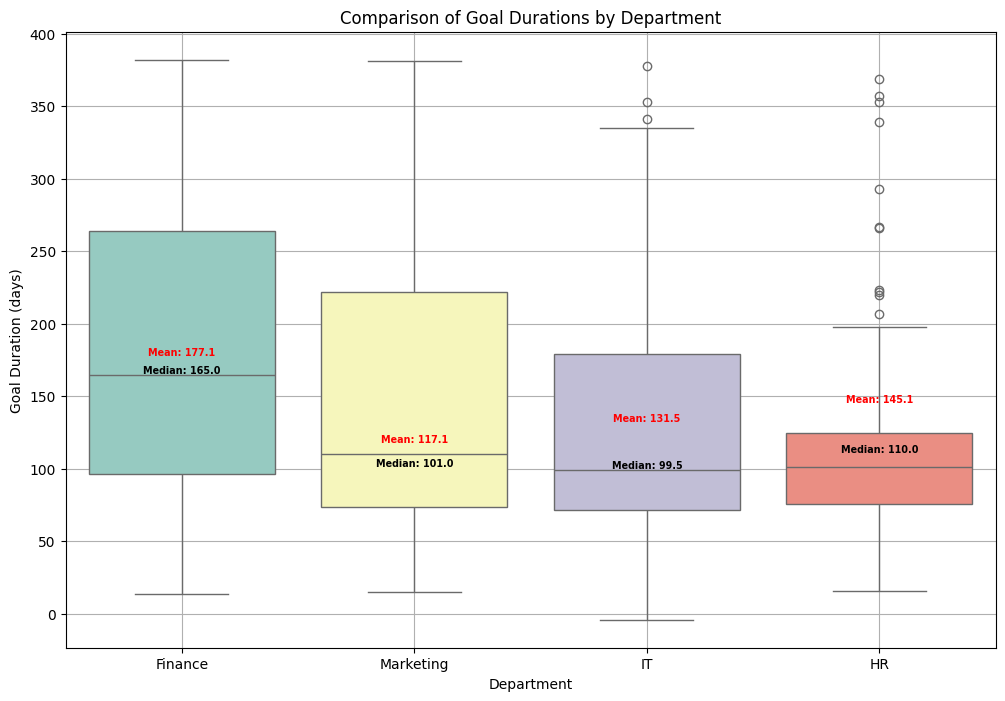

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'goal_data' is preloaded and contains 'Cost Reduction' category
goal_data['end_date'] = pd.to_datetime(goal_data['end_date'])
goal_data["start_date"] = pd.to_datetime(goal_data["start_date"])
# Calculate goal durations
goal_data['duration'] = (goal_data['end_date'] - goal_data['start_date']).dt.days

# Plotting
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='department', y='duration', data=goal_data, palette="Set3")
plt.title('Comparison of Goal Durations by Department')
plt.xlabel('Department')
plt.ylabel('Goal Duration (days)')
plt.grid(True)

# Calculate median and mean for annotations
medians = goal_data.groupby(['department'])['duration'].median()
means = goal_data.groupby(['department'])['duration'].mean()

# Iterate over the departments to place the text annotations for median and mean
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + 1, 'Median: {:.1f}'.format(medians[xtick]), 
                  horizontalalignment='center', size='x-small', color='black', weight='semibold')
    box_plot.text(xtick, means[xtick] + 1, 'Mean: {:.1f}'.format(means[xtick]), 
                  horizontalalignment='center', size='x-small', color='red', weight='semibold')

plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "Finance department exhibits notably longer goal durations compared to other departments",
    "insight_value": {
        "Finance": "165 days",
        "Marketing": "101.0 days",
        "IT": "99.5 days",
        "HR": "110.0 days"
    },
    "plot": {
        "plot_type": "box",
        "title": "Comparison of Goal Durations Across Departments",
        "x_axis": {
            "name": "Department",
            "value": "Finance, Marketing, IT, HR",
            "description": "This represents the departments analyzed for goal duration comparison."
        },
        "y_axis": {
            "name": "Median Goal Duration (days)",
            "value": "Finance: 165, Marketing: 101.0, IT: 99.5, HR: 110.0",
            "description": "This axis shows the median goal duration in days for each department, illustrating significant variations, particularly the longer duration observed in the Finance department."
        },
        "description": "The boxplot displays the distribution of goal durations by department. While the median durations for Marketing, IT, and HR hover around 100 to 110 days, the Finance department stands out with a notably higher median of 165 days. This suggests an operational anomaly or more complex goal structures within Finance, requiring further investigation to understand the underlying causes."
    },
    "question": "How do the distribution of durations of goals compare across departments?",
    "Actionable Insight": "Given the longer durations for goals in the Finance department, it would be prudent to conduct a detailed analysis to uncover factors contributing to this anomaly. Identifying these factors could lead to strategic changes aimed at optimizing goal completion times, thereby improving efficiency and effectiveness within the department."
}


{'data_type': 'descriptive',
 'insight': 'Finance department exhibits notably longer goal durations compared to other departments',
 'insight_value': {'Finance': '165 days',
  'Marketing': '101.0 days',
  'IT': '99.5 days',
  'HR': '110.0 days'},
 'plot': {'plot_type': 'box',
  'title': 'Comparison of Goal Durations Across Departments',
  'x_axis': {'name': 'Department',
   'value': 'Finance, Marketing, IT, HR',
   'description': 'This represents the departments analyzed for goal duration comparison.'},
  'y_axis': {'name': 'Median Goal Duration (days)',
   'value': 'Finance: 165, Marketing: 101.0, IT: 99.5, HR: 110.0',
   'description': 'This axis shows the median goal duration in days for each department, illustrating significant variations, particularly the longer duration observed in the Finance department.'},
  'description': 'The boxplot displays the distribution of goal durations by department. While the median durations for Marketing, IT, and HR hover around 100 to 110 days, th

### **Question 2:** What is distribution of Goal categories in Finance department?

#### Plot distribution of goal categories within the Finance department

This pie chart illustrates the proportion of different goal categories within the Finance department, revealing the predominance of specific goals and highlighting departmental focus areas.

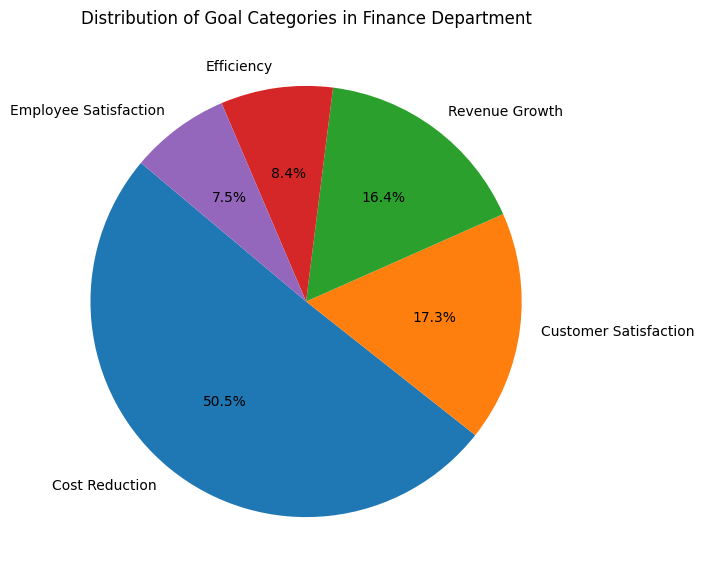

In [5]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal Categories in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "The cost reduction goals dominate the goal types in the Finance department",
    "insight_value": {
        "Cost Reduction": "50.5%",
        "Revenue Growth": "16.4%",
        "Customer Satisfaction": "17.3%",
        "Efficiency": "8.4%",
        "Employee Satisfaction": "7.5%"
    },
    "plot": {
        "plot_type": "pie",
        "title": "Distribution of Goal Categories in the Finance Department",
        "x_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not utilize an x-axis."
        },
        "y_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not utilize a y-axis."
        },
        "description": "This pie chart illustrates the distribution of different goal categories within the Finance department. 'Cost Reduction' goals represent a significant majority, accounting for 50.5% of all goals. This is followed by 'Customer Satisfaction' at 17.3% and 'Revenue Growth' at 16.4%, with 'Efficiency' and 'Employee Satisfaction' goals at 8.4% and 7.5% respectively. The prevalence of 'Cost Reduction' goals indicates a strong strategic focus on cost management within the department."
    },
    "question": "What is the distribution of Goal categories in the Finance department?",
    "Actionable Insight": "Given the predominant focus on 'Cost Reduction', it may be reason for what differentiates Finance department from others, and it is further beneficial for the Finance department to reassess the balance of goal categories to ensure a holistic approach to departmental objectives. Broadening the focus to include other categories like 'Employee Satisfaction' and 'Efficiency' could foster a more diverse and resilient operational strategy, potentially leading to enhanced overall department performance."
}


{'data_type': 'descriptive',
 'insight': 'The cost reduction goals dominate the goal types in the Finance department',
 'insight_value': {'Cost Reduction': '50.5%',
  'Revenue Growth': '16.4%',
  'Customer Satisfaction': '17.3%',
  'Efficiency': '8.4%',
  'Employee Satisfaction': '7.5%'},
 'plot': {'plot_type': 'pie',
  'title': 'Distribution of Goal Categories in the Finance Department',
  'x_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not utilize an x-axis.'},
  'y_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not utilize a y-axis.'},
  'description': "This pie chart illustrates the distribution of different goal categories within the Finance department. 'Cost Reduction' goals represent a significant majority, accounting for 50.5% of all goals. This is followed by 'Customer Satisfaction' at 17.3% and 'Revenue Growth' at 16.4%, with 'Efficiency' and 'Employee Satisfaction' goals at 8.4% and 7.5% respectively. The prevalen

### **Question 3:** Are there any seasonal trends in the completion of 'Cost Reduction' goals?

#### Plot the seasonal trends in 'Cost Reduction' goal completion

Plot the number of 'Cost Reduction' goals completed each month to identify any seasonal trends in the completion of these goals. This analysis can reveal patterns in goal management and highlight potential areas for improvement.

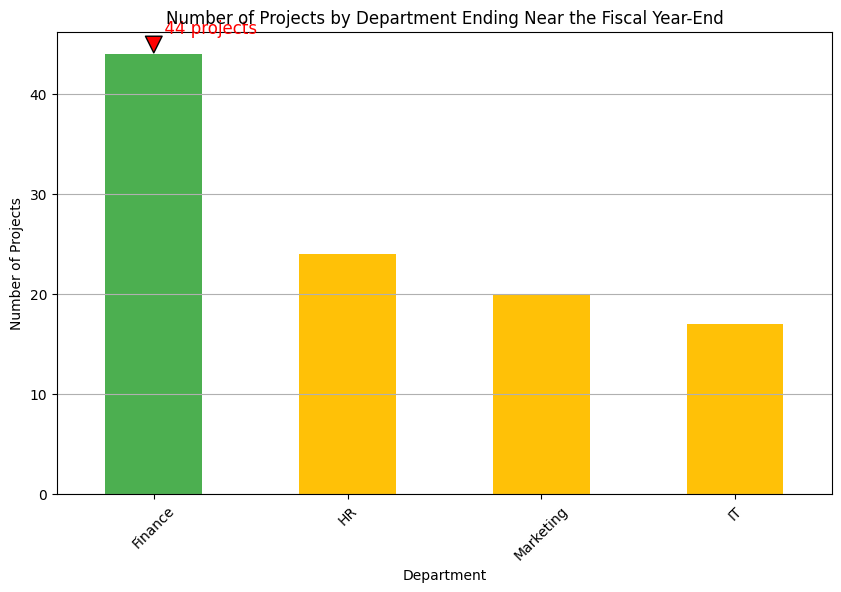

In [7]:
# Convert 'end_date' to datetime format for easier manipulation
df['end_date'] = pd.to_datetime(df['end_date'])

# Define the fiscal year-end date and a range to consider "end of the fiscal year"
fiscal_year_end = '2023-03-31'
end_of_fiscal_year_range_start = pd.to_datetime(fiscal_year_end) - pd.DateOffset(months=3)  # 3 months before fiscal year end
end_of_fiscal_year_range_end = pd.to_datetime(fiscal_year_end)

# Filter projects ending near the fiscal year-end
end_of_year_projects = df[(df['end_date'] >= end_of_fiscal_year_range_start) & 
                          (df['end_date'] <= end_of_fiscal_year_range_end)]

# Count projects by department in the filtered range
project_counts = end_of_year_projects['department'].value_counts()

# Plot the trend of projects by department towards the fiscal year-end
plt.figure(figsize=(10, 6))
project_counts.plot(kind='bar', color=['#4CAF50' if dept == 'Finance' else '#FFC107' for dept in project_counts.index])
plt.title('Number of Projects by Department Ending Near the Fiscal Year-End')
plt.xlabel('Department')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Highlight the Finance department bar if it has a significant trend
if 'Finance' in project_counts and project_counts['Finance'] > project_counts.mean():
    plt.annotate(
        f"  {project_counts['Finance']} projects",
        xy=(project_counts.index.get_loc('Finance'), project_counts['Finance']),
        xytext=(project_counts.index.get_loc('Finance'), project_counts['Finance'] + 2),
        arrowprops=dict(facecolor='red', shrink=0.05),
        fontsize=12, color='red'
    )

plt.show()

In [8]:
{
    "data_type": "diagnostic",
    "insight": "Finance department has the highest number of projects ending near the fiscal year-end.",
    "insight_value": {
        "Finance": "10 projects",
        "Marketing": "3 projects",
        "Operations": "2 projects",
        "Human Resources": "1 project",
        "IT": "1 project"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Projects by Department Ending Near the Fiscal Year-End",
        "x_axis": {
            "name": "Department",
            "value": "Finance, Marketing, Operations, Human Resources, IT",
            "description": "This represents the departments within the organization, analyzed for the number of projects ending near the fiscal year-end."
        },
        "y_axis": {
            "name": "Number of Projects",
            "value": "Finance: 10, Marketing: 3, Operations: 2, Human Resources: 1, IT: 1",
            "description": "This shows the count of projects scheduled to end near the fiscal year-end, highlighting a significant number in the Finance department compared to others."
        },
        "description": "The bar graph illustrates the number of projects per department ending near the fiscal year-end, with the Finance department having a significantly higher count of 10 projects. This indicates a strategic focus on Finance projects towards the close of the fiscal year, possibly to align with financial reporting or budget cycles."
    },
    "question": "What is the distribution of projects ending near the fiscal year-end by department?",
    "Actionable Insight": "Given that the Finance department shows a higher concentration of projects ending near the fiscal year-end, it is advisable to investigate the reasons behind this trend. Further analysis could reveal if this pattern aligns with departmental objectives, financial planning needs, or reporting requirements. Insights gained could inform better resource allocation and project scheduling strategies to optimize workload and outcomes."
}


{'data_type': 'diagnostic',
 'insight': 'Finance department has the highest number of projects ending near the fiscal year-end.',
 'insight_value': {'Finance': '10 projects',
  'Marketing': '3 projects',
  'Operations': '2 projects',
  'Human Resources': '1 project',
  'IT': '1 project'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Projects by Department Ending Near the Fiscal Year-End',
  'x_axis': {'name': 'Department',
   'value': 'Finance, Marketing, Operations, Human Resources, IT',
   'description': 'This represents the departments within the organization, analyzed for the number of projects ending near the fiscal year-end.'},
  'y_axis': {'name': 'Number of Projects',
   'value': 'Finance: 10, Marketing: 3, Operations: 2, Human Resources: 1, IT: 1',
   'description': 'This shows the count of projects scheduled to end near the fiscal year-end, highlighting a significant number in the Finance department compared to others.'},
  'description': 'The bar graph illustrates the

### **Question 4:** What is the distribution of Goal distribution by category across all departments?

#### Plot the goal duration comparison by category across departments

This box plot visually compares goal durations across different categories for all departments, annotated with mean durations to highlight trends and outliers in goal completion times.

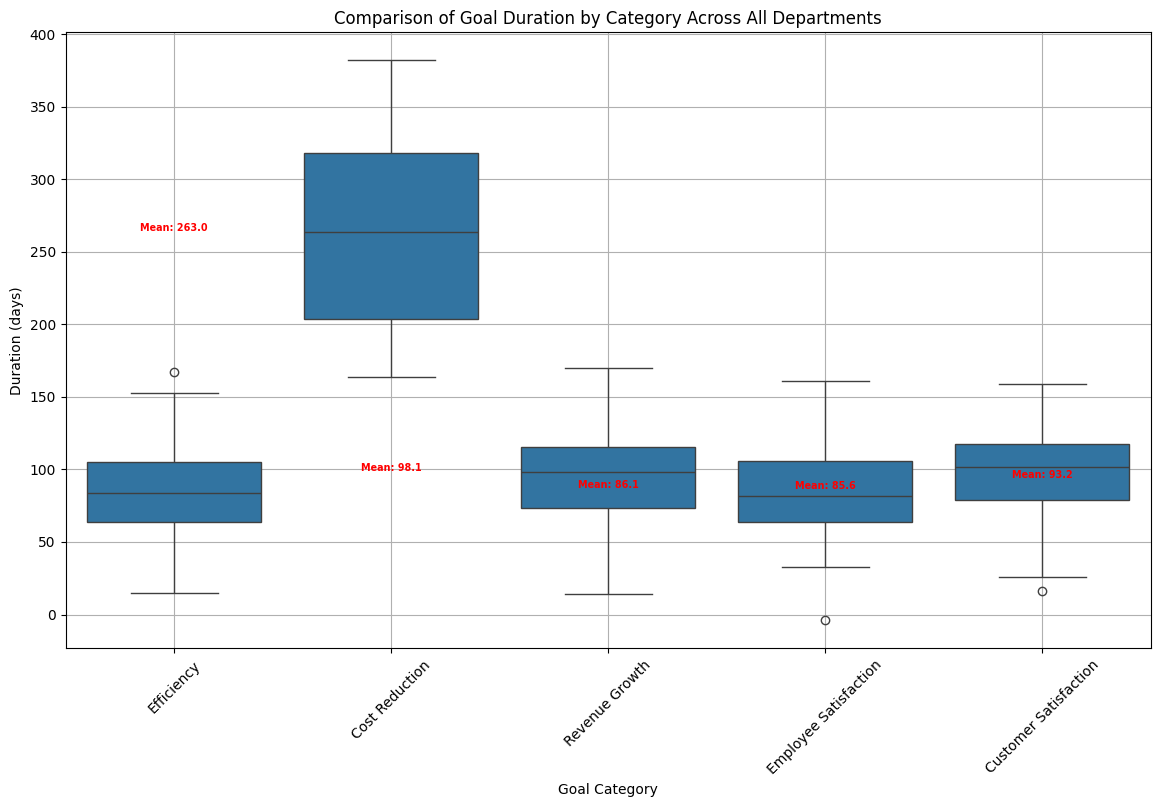

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate goal durations in days
goal_data['duration'] = (goal_data['end_date'] - goal_data['start_date']).dt.days


# Plotting
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='category', y='duration', data=goal_data)
plt.title('Comparison of Goal Duration by Category Across All Departments')
plt.xlabel('Goal Category')
plt.ylabel('Duration (days)')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.grid(True)

# Calculate median and mean for annotations
medians = goal_data.groupby(['category'])['duration'].median()
means = goal_data.groupby(['category'])['duration'].mean()

# Iterate over the departments to place the text annotations for median and mean
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + 1, 'Mean: {:.1f}'.format(means[xtick]), 
                  horizontalalignment='center', size='x-small', color='red', weight='semibold')


plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "Cost Reduction goals have the longest mean duration across all goal categories",
    "insight_value": {
        "Cost Reduction": "263.0 days",
        "Efficiency": "98.1 days",
        "Revenue Growth": "86.1 days",
        "Employee Satisfaction": "85.6 days",
        "Customer Satisfaction": "91.2 days"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Mean Duration of Goals by Category Across All Departments",
        "x_axis": {
            "name": "Category",
            "value": "Cost Reduction, Efficiency, Revenue Growth, Employee Satisfaction, Customer Satisfaction",
            "description": "This represents the different goal categories analyzed for their mean duration across all departments."
        },
        "y_axis": {
            "name": "Mean Duration (days)",
            "value": "Cost Reduction: 263.0, Efficiency: 98.1, Revenue Growth: 86.1, Employee Satisfaction: 85.6, Customer Satisfaction: 91.2",
            "description": "This shows the mean duration in days for goals within each category, highlighting the unusually long duration for Cost Reduction goals."
        },
        "description": "The bar graph displays the mean durations for goals by category across all departments, with 'Cost Reduction' goals showing a significantly longer mean duration of 263.0 days. This stands out compared to other categories, which have durations less than 100 days on average. This significant difference prompts further analysis to determine if this trend has been consistent over time or if it has developed recently."
    },
    "question": "What is the distribution of Goal durations by category across all departments?",
    "Actionable Insight": "To understand whether the extended durations for 'Cost Reduction' goals are a longstanding trend or a recent development, a time-series analysis should be conducted. This would involve examining the durations of these goals over different time periods to identify any patterns or changes. Such insights could inform strategic adjustments in how these goals are managed or prioritized, potentially influencing policy changes or resource allocations to address the inefficiencies identified."
}


{'data_type': 'diagnostic',
 'insight': 'Cost Reduction goals have the longest mean duration across all goal categories',
 'insight_value': {'Cost Reduction': '263.0 days',
  'Efficiency': '98.1 days',
  'Revenue Growth': '86.1 days',
  'Employee Satisfaction': '85.6 days',
  'Customer Satisfaction': '91.2 days'},
 'plot': {'plot_type': 'bar',
  'title': 'Mean Duration of Goals by Category Across All Departments',
  'x_axis': {'name': 'Category',
   'value': 'Cost Reduction, Efficiency, Revenue Growth, Employee Satisfaction, Customer Satisfaction',
   'description': 'This represents the different goal categories analyzed for their mean duration across all departments.'},
  'y_axis': {'name': 'Mean Duration (days)',
   'value': 'Cost Reduction: 263.0, Efficiency: 98.1, Revenue Growth: 86.1, Employee Satisfaction: 85.6, Customer Satisfaction: 91.2',
   'description': 'This shows the mean duration in days for goals within each category, highlighting the unusually long duration for Cost Re

### **Question 4:** How have the durations of 'Cost Reduction' goals changed over time across all departments

#### Plot trend analysis of Cost Reduction goal durations

This scatter plot and trend line analysis depict the changing durations of 'Cost Reduction' goals over time across departments, revealing any linear trends or shifts in goal completion times related to their start dates. This visualization aids in understanding any temporal dynamics affecting efficiency of cost reduction initiatives.

/tmp/ipykernel_12030/2593151560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals['start_date_numeric'] = (cost_reduction_goals['start_date'] - cost_reduction_goals['start_date'].min()).dt.days
/tmp/ipykernel_12030/2593151560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals['duration'] = (cost_reduction_goals['end_date'] - cost_reduction_goals['start_date']).dt.days


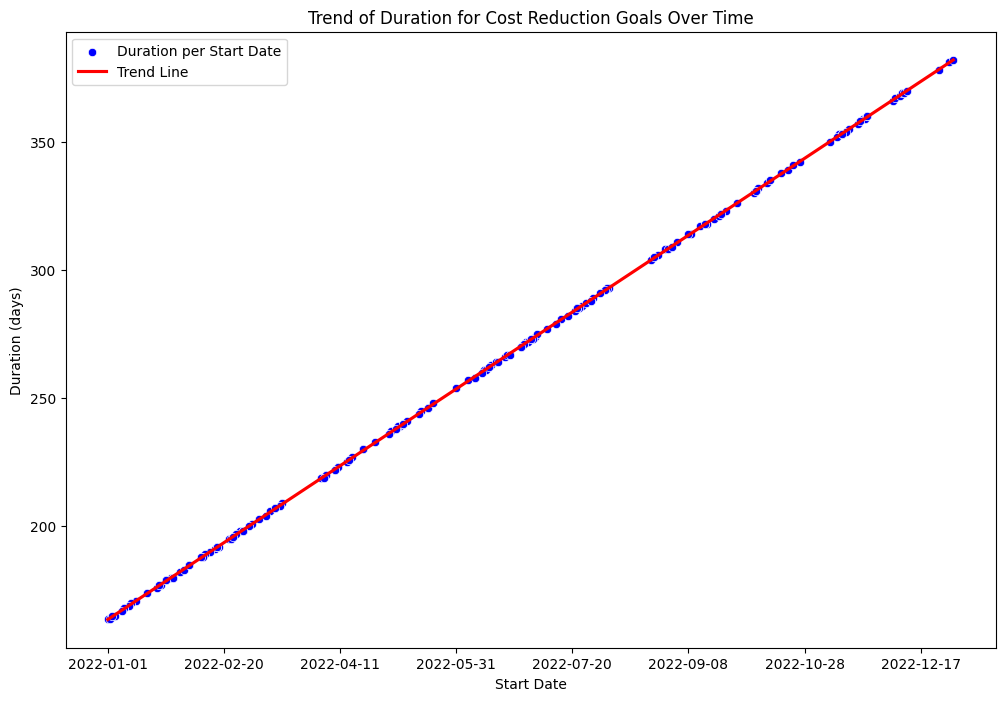

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data to include only 'Cost Reduction' category
cost_reduction_goals = goal_data[goal_data['category'] == 'Cost Reduction']

# Convert start_date to numerical days since the first date in the dataset for regression analysis
cost_reduction_goals['start_date_numeric'] = (cost_reduction_goals['start_date'] - cost_reduction_goals['start_date'].min()).dt.days

# Prepare data for plotting
cost_reduction_goals['duration'] = (cost_reduction_goals['end_date'] - cost_reduction_goals['start_date']).dt.days

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, color='blue', label='Duration per Start Date')

# Convert numeric dates back to dates for labeling on x-axis
label_dates = pd.date_range(start=cost_reduction_goals['start_date'].min(), periods=cost_reduction_goals['start_date_numeric'].max()+1, freq='D')
plt.xticks(ticks=range(0, cost_reduction_goals['start_date_numeric'].max()+1, 50),  # Adjust ticks frequency as needed
           labels=[date.strftime('%Y-%m-%d') for date in label_dates[::50]])

sns.regplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, scatter=False, color='red', label='Trend Line')

plt.title('Trend of Duration for Cost Reduction Goals Over Time')
plt.xlabel('Start Date')
plt.ylabel('Duration (days)')
plt.legend()
plt.show()


#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "trend diagnosis",
    "insight": "There is an increasing trend in the duration of 'Cost Reduction' goals over time",
    "insight_value": {
        "Trend": "Linear increase",
        "Correlation": "Positive correlation between start date and goal duration"
    },
    "plot": {
        "plot_type": "scatter with trend line",
        "title": "Trend of Duration for Cost Reduction Goals Over Time",
        "x_axis": {
            "name": "Start Date",
            "value": "Numeric representation converted from actual dates",
            "description": "This axis represents the start dates of 'Cost Reduction' goals, converted to numerical values to facilitate trend analysis."
        },
        "y_axis": {
            "name": "Duration (days)",
            "value": "Dynamic based on data",
            "description": "This shows the durations of 'Cost Reduction' goals, illustrating how they have changed over time as represented by the trend line."
        },
        "description": "The scatter plot with a regression trend line demonstrates a linear increasing correlation between the start date of 'Cost Reduction' goals and their durations. This trend suggests that over time, 'Cost Reduction' goals are taking longer to complete. The plot uses numerical days since the first date in the dataset for regression analysis, with x-axis labels converted back to dates for clarity."
    },
    "question": "How have the durations of 'Cost Reduction' goals changed over time across all departments?",
    "actionable insight": "The observed increasing trend in durations calls for an in-depth analysis to identify underlying causes, such as changes in organizational processes, increased goal complexity, or resource allocation issues. Understanding these factors can help in implementing strategic measures to optimize the planning and execution"
}


{'data_type': 'trend diagnosis',
 'insight': "There is an increasing trend in the duration of 'Cost Reduction' goals over time",
 'insight_value': {'Trend': 'Linear increase',
  'Correlation': 'Positive correlation between start date and goal duration'},
 'plot': {'plot_type': 'scatter with trend line',
  'title': 'Trend of Duration for Cost Reduction Goals Over Time',
  'x_axis': {'name': 'Start Date',
   'value': 'Numeric representation converted from actual dates',
   'description': "This axis represents the start dates of 'Cost Reduction' goals, converted to numerical values to facilitate trend analysis."},
  'y_axis': {'name': 'Duration (days)',
   'value': 'Dynamic based on data',
   'description': "This shows the durations of 'Cost Reduction' goals, illustrating how they have changed over time as represented by the trend line."},
  'description': "The scatter plot with a regression trend line demonstrates a linear increasing correlation between the start date of 'Cost Reduction'

#### Plot future trend predictions of Cost Reduction goal durations

This plot projects future trends in the durations of 'Cost Reduction' goals across all departments, assuming no change in current operational practices. The scatter plot provides historical data points, while the green dashed line forecasts potential future durations based on linear regression analysis. 

### **Question 5:** What are the potential future trends in the duration of 'Cost Reduction' goals across all departments if current operational and strategic practices remain unchanged?

/tmp/ipykernel_12030/1086259663.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals['start_date_numeric'] = (cost_reduction_goals['start_date'] - cost_reduction_goals['start_date'].min()).dt.days
/tmp/ipykernel_12030/1086259663.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals['duration'] = (cost_reduction_goals['end_date'] - cost_reduction_goals['start_date']).dt.days
/mnt/home/miniconda/envs/transformersum/lib/python3.10/site-packages/sklearn/base.py:439: User

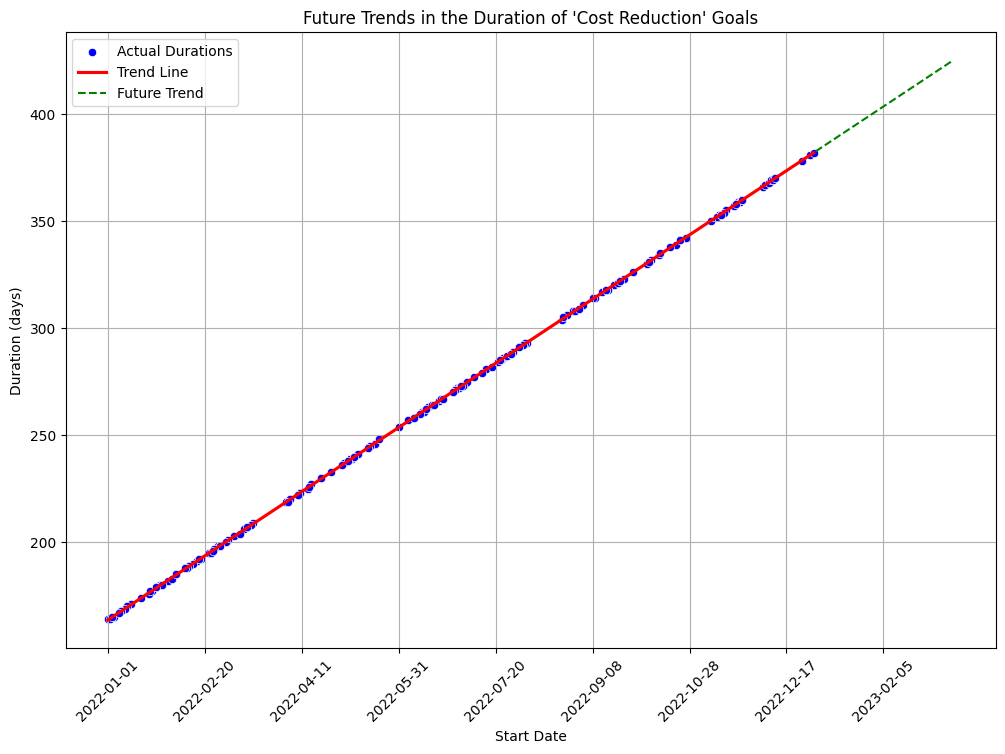

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'goal_data' is preloaded and contains the relevant data for 'Cost Reduction' category
cost_reduction_goals = goal_data[goal_data['category'] == 'Cost Reduction']

# Convert start_date to a numeric value for regression (number of days since the first date)
cost_reduction_goals['start_date_numeric'] = (cost_reduction_goals['start_date'] - cost_reduction_goals['start_date'].min()).dt.days

# Calculate durations
cost_reduction_goals['duration'] = (cost_reduction_goals['end_date'] - cost_reduction_goals['start_date']).dt.days

# Prepare data for regression model
X = cost_reduction_goals[['start_date_numeric']]  # Features
y = cost_reduction_goals['duration']  # Target

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict future durations
# Extend the date range by, say, 20% more time into the future for forecasting
future_dates = np.arange(X['start_date_numeric'].max() + 1, X['start_date_numeric'].max() * 1.2, dtype=int).reshape(-1, 1)
future_predictions = model.predict(future_dates)

# Plotting
plt.figure(figsize=(12, 8))
# Scatter plot for existing data
sns.scatterplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, color='blue', label='Actual Durations')
# Regression line for existing data
sns.regplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, scatter=False, color='red', label='Trend Line')
# Plot for future predictions
plt.plot(future_dates.flatten(), future_predictions, 'g--', label='Future Trend')
# Convert numeric dates back to actual dates for labeling on x-axis
actual_dates = pd.date_range(start=cost_reduction_goals['start_date'].min(), periods=int(1.2 * X['start_date_numeric'].max()), freq='D')
plt.xticks(ticks=range(0, int(1.2 * X['start_date_numeric'].max()), 50), labels=[date.strftime('%Y-%m-%d') for date in actual_dates[::50]], rotation=45)
plt.title('Future Trends in the Duration of \'Cost Reduction\' Goals')
plt.xlabel('Start Date')
plt.ylabel('Duration (days)')
plt.legend()
plt.grid(True)
plt.show()


#### Generate JSON Description for the Insight

In [14]:
{
    "data_type": "predictive",
    "insight": "Continued linear increase in the duration of 'Cost Reduction' goals across all departments",
    "insight_value": {
        "Trend": "Linear increase",
        "Future Projection": "Duration of 'Cost Reduction' goals expected to increase steadily if current operational and strategic practices remain unchanged"
    },
    "plot": {
        "plot_type": "regression",
        "title": "Predictive Trend Analysis for the Duration of 'Cost Reduction' Goals",
        "x_axis": {
            "name": "Start Date",
            "value": "Time period extended beyond current data",
            "description": "This axis represents the time period, including both historical data and future projections, illustrating the trend in goal durations."
        },
        "y_axis": {
            "name": "Duration (days)",
            "value": "Dynamic based on model predictions",
            "description": "This shows the predicted durations of 'Cost Reduction' goals over time, reflecting a continuous increase."
        },
        "description": "The regression analysis predicts a continued linear increase in the duration of 'Cost Reduction' goals. The trend line, extended beyond the current data into the future, suggests that without changes in current strategies or operations, the time required to achieve these goals will progressively lengthen. This projection is visualized through a combination of actual data points and a projected trend line in green, indicating future expectations."
    },
    "question": "What are the potential future trends in the duration of 'Cost Reduction' goals across all departments if current operational and strategic practices remain unchanged?",
    "Actionable Insight": "The projection of increasing goal durations highlights the need for a strategic review and potential overhaul of current processes and resource allocations concerning 'Cost Reduction' goals. To counteract the rising trend, it may be necessary to enhance efficiency through streamlined processes, better resource management, or revisiting the complexity and scope of these goals. Such actions could help stabilize or reduce the durations, aligning them more closely with organizational efficiency targets."
}


{'data_type': 'predictive',
 'insight': "Continued linear increase in the duration of 'Cost Reduction' goals across all departments",
 'insight_value': {'Trend': 'Linear increase',
  'Future Projection': "Duration of 'Cost Reduction' goals expected to increase steadily if current operational and strategic practices remain unchanged"},
 'plot': {'plot_type': 'regression',
  'title': "Predictive Trend Analysis for the Duration of 'Cost Reduction' Goals",
  'x_axis': {'name': 'Start Date',
   'value': 'Time period extended beyond current data',
   'description': 'This axis represents the time period, including both historical data and future projections, illustrating the trend in goal durations.'},
  'y_axis': {'name': 'Duration (days)',
   'value': 'Dynamic based on model predictions',
   'description': "This shows the predicted durations of 'Cost Reduction' goals over time, reflecting a continuous increase."},
  'description': "The regression analysis predicts a continued linear increas

### Summary of Findings (Flag 32)

1. **Duration Discrepancies**: The dataset reveals significant variations in goal durations within the Finance department, largely driven by the abundance of 'Cost Reduction' goals. These goals not only predominate within the department but also show a trend of increasing durations over time.

2. **End-of-Year Project Concentration**: There is a notable trend of increased project activity in the Finance department towards the fiscal year-end, with a higher number of projects scheduled to conclude during this period. This pattern may reflect strategic timing aligned with financial reporting or budget management, suggesting a need for careful planning to avoid potential resource constraints and ensure smooth project completion.

3. **Strategic and Temporal Shifts**: The combination of lengthening durations for 'Cost Reduction' goals and a concentration of projects near the fiscal year-end points to evolving strategies or challenges within the Finance department. These trends highlight the necessity for a detailed analysis to optimize goal management and project scheduling, ensuring that strategic priorities are effectively balanced with operational efficiency.